#                                        数据挖掘大作业

一、youtube数据处理及分析

1.数据处理

1）加载csv数据，查看数据缺失值

In [5]:
from pandas import Series,DataFrame,np
from numpy import nan as NA
import pandas as pd
#1.加载数据
def load_data(path,filename):
    return pd.read_csv(path + '/' + filename)
root = 'E:\youtube-new'
data = load_data(root,'CAvideos.csv')#中文

#2.缺失数据统计 -列
data.isnull().sum()
print("每列缺失的数据个数分别为:")
print(data.isnull().sum())

e:\python37\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  """Entry point for launching an IPython kernel.


每列缺失的数据个数分别为:
video_id                     0
trending_date                0
title                        0
channel_title                0
category_id                  0
publish_time                 0
tags                         0
views                        0
likes                        0
dislikes                     0
comment_count                0
thumbnail_link               0
comments_disabled            0
ratings_disabled             0
video_error_or_removed       0
description               1296
dtype: int64


2）缺失值填补
观察数据缺失值，发现只有description一个属性有1296个缺失值。观察属性之间的关系，可用同元组对应的title值填补description值。

In [8]:
#3.缺失值填补-只有description属性有缺失值，根据其特点，可填充上对应的title
print("description根据title值进行填补")
# 查看description特征缺失处对应的
#包含description所需信息的title特征的具体情况
description_locationdes=data.loc[data['description'].isnull(), 'title']
# 等号左边为description特征缺失信息的具体位置，
#利用字符串提取来补充description的缺失信息
data.loc[data['description'].isnull(), 'description'] =
     [str(x)[0: len(str(x))] for x in description_locationdes]

#检验缺失值处理后是否还存在缺失值(为精简篇幅，故只显示description的缺失值)
print("填补后description的缺失个数为:\n",data['description'].isnull().sum())

description根据title值进行填补
填补后description的缺失个数为:
 0


youtube数据共有9个国家（其中KR,JP和RU无法解码），所以选取6个国家，修改加载时的文件名，对其他数据缺失值进行处理，得到表格如下：
![title](/youtube_data_all_table.png)

对填补后的数据进行去重处理（一般不重复，以防万一）

In [11]:
#4.删除重复数据
print("删除重复数据")
#去重,默认保留前一个
df=data.drop_duplicates()
print("处理后的数据行列分别为:",df.shape[0])
# #处理后的数据，由于占篇幅过大，故暂不打印
# print("处理后的数据为:",df)

删除重复数据
处理后的数据行列分别为: 40881


In [ ]:
对数据进行描述
  得到基本统计量-行数、平均值、协方差、最小值、四分之一分位数、中位数、四分之三分位数、最大值。

In [13]:
#5.汇总和描述等统计量的计算
print("汇总和描述等统计量的计算")
#对数据的基本统计量进行描述,得到每列数据的行数、平均值、协方差、
#最小值、四分之一分位数、中位数、四分之三分位数、最大值
print(df.describe())

汇总和描述等统计量的计算
        category_id         views         likes      dislikes  comment_count
count  40881.000000  4.088100e+04  4.088100e+04  4.088100e+04   4.088100e+04
mean      20.795553  1.147036e+06  3.958269e+04  2.009195e+03   5.042975e+03
std        6.775054  3.390913e+06  1.326895e+05  1.900837e+04   2.157902e+04
min        1.000000  7.330000e+02  0.000000e+00  0.000000e+00   0.000000e+00
25%       20.000000  1.439020e+05  2.191000e+03  9.900000e+01   4.170000e+02
50%       24.000000  3.712040e+05  8.780000e+03  3.030000e+02   1.301000e+03
75%       24.000000  9.633020e+05  2.871700e+04  9.500000e+02   3.713000e+03
max       43.000000  1.378431e+08  5.053338e+06  1.602383e+06   1.114800e+06


观察数据，发现views，likes，dislikes和comment_count数值过大，不太适合绘制盒图或直方图，category_id可绘制盒图，可统计category_id每种id出现的频数绘制直方图，对于频数统计，还可统计channel_title出现的频数。对于Views属性，可以统计所有国家总共观看次数最多的视频top6；对于like和dislikes，可以创建一个新属性“赞踩比”，统计赞踩比最高的10支视频及比值。

In [15]:
#6.2 channel_title的频数和频率
se_channel_title=pd.Series(df['channel_title'])
count_channel_title=dict(se_channel_title.value_counts())
proport_channel_title = dict(se_channel_title.value_counts(normalize=True))
print("channel_title位于前十名的频数分别为:")
for i,(key,value) in enumerate(count_channel_title.items()):
    if i in range(0,10):
       print(key,value)
#频率最高的也<0.05，因此不输出频率
# print("channel_title位于前十名的频率分别为:")
# for i,(key,value) in enumerate(proport_channel_title.items()):
#     if i in range(0,10):
#        print(key,value)
# print("\n")

channel_title位于前十名的频数分别为:
SET India 192
MSNBC 189
FBE 188
The Young Turks 186
REACT 183
VikatanTV 182
CNN 182
The Late Show with Stephen Colbert 172
RadaanMedia 168
ARY Digital 168


将pd.Series(df['channel_title'])单引号内的属性名改为category_id即统计频数top10的类别

In [16]:
#6.3 category_id频数和频率
se_category_id=pd.Series(df['category_id'])
count_category_id=dict(se_category_id.value_counts())
proport_category_id = dict(se_category_id.value_counts(normalize=True))
print("category_id位于前十名的频数分别为:")
for i,(key,value) in enumerate(count_category_id.items()):
    if i in range(0,10):
       print(key,value)
print("category_id位于前十名的频率分别为:")
for i,(key,value) in enumerate(proport_category_id.items()):
    if i in range(0,10):
       print(key,value)
print("\n")

category_id位于前十名的频数分别为:
24 13451
25 4159
22 4105
23 3773
10 3731
17 2787
1 2060
26 2007
20 1344
28 1155
category_id位于前十名的频率分别为:
24 0.32902815488857906
25 0.1017343019984834
22 0.10041339497566107
23 0.09229226290942003
10 0.0912648907805582
17 0.06817347912233067
1 0.050390156796555854
26 0.049093711014896894
20 0.03287590812357819
28 0.028252733543700007




引入赞踩比属性，统计top10赞踩比视频

In [17]:
#7.拓展探索
#7.1赞踩比最高的前十个视频

ratio_like_dis=df['likes']/(df['dislikes']+1)
df['ratio_like_dis']=ratio_like_dis
df_sort=df.sort_values(by='ratio_like_dis',ascending=False)
print("赞踩比位于前十名的视频名和比值分别为:")
print("序号 ","标题 ","                               ","赞踩比")
for i in range(0,10):
        if len(df_sort.iloc[i,2])<=35:
            print(i+1," ",df_sort.iloc[i,2],"   ",df_sort.iloc[i,16])   
        else:
            print(i+1," ",df_sort.iloc[i,2][:32],"...   ",df_sort.iloc[i,16])    

print("\n")

赞踩比位于前十名的视频名和比值分别为:
序号  标题                                  赞踩比
1   The Reaction of The Streets (I W ...    2559.9
2   Day6 Tomfoolery in NY and Japan         1263.5
3   THE POPULAR DANCE TUTORIALS OF 9 ...    1198.4827586206898
4   G.C.F in Osaka                          1001.0959302325581
5   This Video Is My Wife's Annivers ...    937.3636363636364
6   The Adventure Zone: Balance trailer     879.5
7   BTS Dish About Debuting New Musi ...    779.5714285714286
8   BTS Tell Us What They Love About ...    766.8048780487804
9   Sing Anything Challenge ( w/Jess ...    766.6111111111111
10   GHOST PEPPER SPICY RAMEN ROULETTE      763.3846153846154




统计各个国家的观看次数

In [18]:
#7.2观看人数最多的视频
df_sort2=df.sort_values(by='views',ascending=False)
print("观看人数前十名的视频名和人次分别为:")
print("序号 ","标题 ","                                              ","观看人次")
for i in range(0,10):
        if len(df_sort.iloc[i,2])<=50:
            print(i+1," ",df_sort2.iloc[i,2],"   ",df_sort2.iloc[i,7])   
        else:
            print(i+1," ",df_sort2.iloc[i,2][:47],"...    ",df_sort2.iloc[i,7])    

print("\n")

观看人数前十名的视频名和人次分别为:
序号  标题                                                 观看人次
1   YouTube Rewind: The Shape of 2017 | #YouTubeRewind     137843120
2   YouTube Rewind: The Shape of 2017 | #YouTubeRewind     125431369
3   YouTube Rewind: The Shape of 2017 | #YouTubeRew ...    113876217
4   YouTube Rewind: The Shape of 2017 | #YouTubeRewind     100911567
5   Childish Gambino - This Is America (Official Video)     98938809
6   Marvel Studios' Avengers: Infinity War Offici ...       89930713
7   Marvel Studios' Avengers: Infinity War Official ...     87450245
8   Childish Gambino - This Is America (Official Vi ...     85092067
9   Marvel Studios' Avengers: Infinity War Official ...     84281319
10   BTS (방탄소년단) 'FAKE LOVE' Official MV               80738011




直方图
category_id

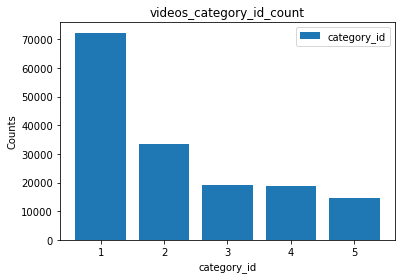

In [23]:
import matplotlib.pyplot as plt
#直方图，因为category_id计数，channel_title计数以及view数值相差较大，故分三个直方图
#category_id直方图
plt.bar([1,2,3,4,5],[72325,33508,19258,18890,14602], label='category_id')

plt.legend()

plt.xlabel('category_id')
plt.ylabel('Counts')

plt.title('videos_category_id_count')

plt.show()